In [25]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from seaborn import load_dataset
from dtreeviz.trees import *  

Decision Trees consists of a series of binary splits. The variables and threshold of the splits can be hand-crafted, but in a machine learning setting they can be learnt on data, with the learning objective of minimizing the prediction error. The following pictures illustrates how such a tree may work for a house price prediction task.

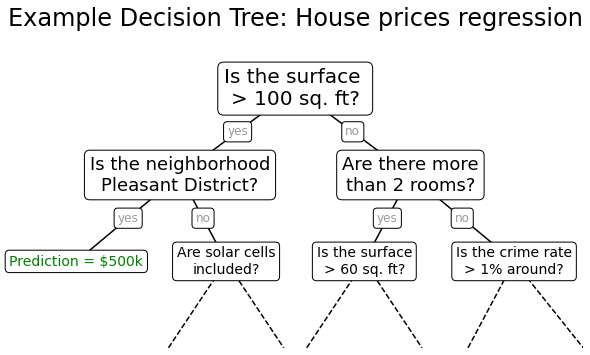

In [23]:

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: House prices regression\n', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "Is the surface \n> 100 sq. ft?", 20)
text(ax, 0.3, 0.6, "Is the neighborhood\nPleasant District?", 18)
text(ax, 0.7, 0.6, "Are there more\nthan 2 rooms?", 18)
text(ax, 0.12, 0.3, "Prediction = $500k", 14, color="green")
text(ax, 0.38, 0.3, "Are solar cells\nincluded?", 14)
text(ax, 0.62, 0.3, "Is the surface\n> 60 sq. ft?", 14)
text(ax, 0.88, 0.3, "Is the crime rate\n> 1% around?", 14)

text(ax, 0.4, 0.75, "yes", 12, alpha=0.4)
text(ax, 0.6, 0.75, "no", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')

ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1]);

#fig.savefig('figures/decision_tree.png')

#### Regression Tree
We use it here to create a Decision Tree for a regression task, that we then fit on the [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv), where the target variable is the amount of tip left by the customer.

In [3]:
tips = load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We first train a decision tree with depth 1 that only uses the "total_bill" feature. That is, we're looking for the single split that best describes the dataset.

In [12]:
X = tips["total_bill"].values.reshape(-1, 1)
y = tips["tip"]

# Create a Decision Tree with a given maximum depth
regressor = DecisionTreeRegressor(max_depth=1)  
regressor.fit(X, y)

# Visualize the fitted tree and the dataset
tree_viz = dtreeviz(regressor, X, y, target_name='Tip', feature_names=["Total bill"])

# Rendering tricks to print the tree
from IPython.display import HTML
HTML('<svg viewBox="0 0 500 170">'+ tree_viz.svg() +'</svg>')

So the best split is found at a total bill of 20.47 dollars. Below this value a tip of 2.40 dollars is predicted, and above a tip of 4.00 dollars is predicted. Let's see another visualization of this learnt tree.

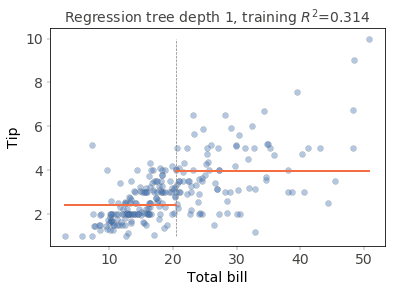

In [ ]:
rtreeviz_univar(plt.figure().gca(), tips["total_bill"], tips["tip"], max_depth=1,
                feature_name='Total bill', target_namem='Tip', fontsize=14)


Here the vertical dotted line is the split value, and the red horizontal lines are the predicted tips amounts for total bills above or below the split.

The fitted model can also be used to predict the tip on previously unseen "total bill" values, e.g. for a total bill of \$100.00 the fitted tree predicts a tip of

In [ ]:
total_bill = 100.00
prediction = regressor.predict([[total_bill]])[0]
print(f"Predicted tip for a total bill of ${total_bill:.2f}: ${prediction:.2f}")

Predicted tip for a total bill of $100.00: $4.00


We can evaluate the perfomance of the model with the [mean absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error).

In [ ]:
tree_predictions = regressor.predict(X)
mae = mean_absolute_error(y, tree_predictions)
print(f"Mean absolute error: ${mae:.2f}")

Mean absolute error: $0.87


This is not too bad, but we have only fitted and plotted a tree with one split here, if we add additional splits the model becomes more precise.

In [35]:
regressor = DecisionTreeRegressor(max_depth=2)  
regressor.fit(X, y) 

# Visualize the fitted tree and the dataset
tree_viz = dtreeviz(regressor, X, y, target_name='Tip', feature_names=["Total bill"])
HTML('<svg viewBox="0 0 1000 250">'+ tree_viz.svg() +'</svg>')

We see that with a depth of 2 we get 4 splits, leading to 4 possible predictions depending on the total bill amount value. We can check that the precision of the mean average error on the training set has decreased.

In [29]:
tree_predictions = regressor.predict(X)
mae = mean_absolute_error(y, tree_predictions)
print(f"Mean absolute error: ${mae:.2f}")

Mean absolute error: $0.73


Here is another representation of the new 4-splits tree that highlight the better fit compared to the previous, 2-splits, tree.

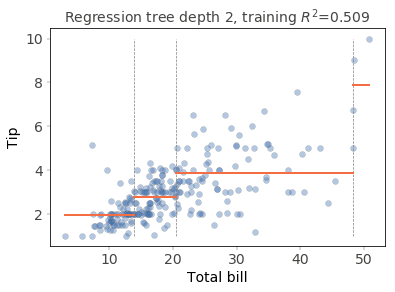

In [ ]:
rtreeviz_univar(plt.figure().gca(), tips["total_bill"], tips["tip"], max_depth=2,
                feature_name='Total bill', target_name='Tip', fontsize=14)

If we want an even better model we can include more predictors, e.g. add the size of the part as an additional predictor. 

Here is the obtained decision tree.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


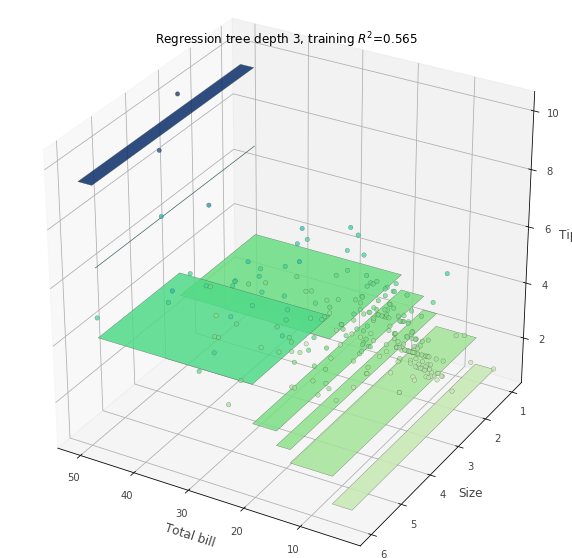

In [ ]:
figsize = (10,10)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

rtreeviz_bivar_3D(ax, tips[["total_bill", "size"]], tips["tip"], max_depth=3,
                  feature_names=['Total bill', 'Size'], target_name='Tip',
                  fontsize=12, elev=30, azim=120, dist=9,
                  show={'splits','title'})


We are starting to see **interactions** between the variables here: if the total bill is larger than 30 dollars, the result also depends on the size of the party: if there are more than 3 persons at the table the tip is on the order of 4 dollars, while it is closer to 3 dollars for smaller parties.

Now we'll preprocess *tips* dataset, then fit and plot a regression decision tree with a maximum depth of 3 using all of the preprocessed variables to predict the tip amount.

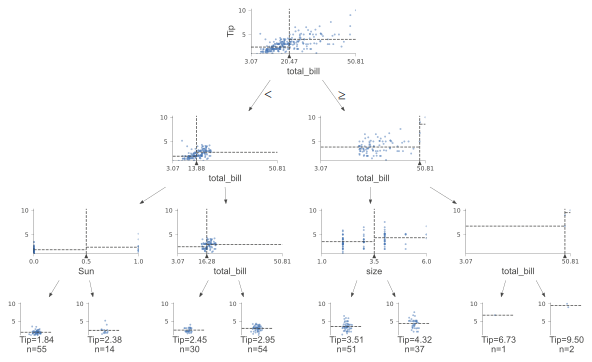

In [36]:
# preprocessing
preprocessed_tips = tips.drop(["sex", "smoker", "day", "time", "tip"], axis=1)
dummy_sex = pd.get_dummies(tips["sex"], drop_first=True)
dummy_smoker = pd.get_dummies(tips["smoker"], drop_first=True)
dummy_day = pd.get_dummies(tips["day"], drop_first=True)                               
dummy_time = pd.get_dummies(tips["time"], drop_first=True)

# Append the one hot encoded columns to the training dataset
preprocessed_tips = pd.concat([preprocessed_tips, dummy_sex, dummy_smoker, dummy_day, dummy_time], 
                              axis=1)

X = preprocessed_tips.values
y = tips["tip"]

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Visualize the fitted tree splits
dtreeviz(regressor, X, y, target_name='Tip',feature_names=preprocessed_tips.columns)
